In [ ]:
import os
import keras
import numpy as np
import pandas as pd
import cv2
import tensorflow
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, ZeroPadding2D
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
dataset_path = os.listdir('/content/drive/MyDrive/schzrinopiadata')
emotion_types = os.listdir('/content/drive/MyDrive/schzrinopiadata')
print (emotion_types)  #what kinds of emotions are in this dataset

print("Types of emotions found: ", len(dataset_path))

['healthy', 'schzrinopia']
Types of emotions found:  2


In [ ]:
emotions = []

for item in emotion_types:
 # Get all the file names
 all_emotions = os.listdir('/content/drive/MyDrive/schzrinopiadata' + '/' +item)
 #print(all_emotion)

 # Add them to the list
 for emotion in all_emotions:
    emotions.append((item, str('emotions_dataset' + '/' +item) + '/' + emotion))
    print(emotions)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Build a dataframe        
emotions_df = pd.DataFrame(data=emotions, columns=['game no.', 'image'])
print(emotions_df.head())
print(emotions_df.tail())

  game no.                                image
0  healthy  emotions_dataset/healthy/h11t3_.png
1  healthy  emotions_dataset/healthy/h11t4_.png
2  healthy  emotions_dataset/healthy/h11t5_.png
3  healthy  emotions_dataset/healthy/h11t6_.png
4  healthy  emotions_dataset/healthy/h12f_3.png
        game no.                                   image
517  schzrinopia  emotions_dataset/schzrinopia/s14pz.png
518  schzrinopia  emotions_dataset/schzrinopia/s14t3.png
519  schzrinopia  emotions_dataset/schzrinopia/s14t4.png
520  schzrinopia  emotions_dataset/schzrinopia/s14t5.png
521  schzrinopia  emotions_dataset/schzrinopia/s14t6.png


In [ ]:
# Let's check how many samples for each category are present
print("Total number of emotions in the dataset: ", len(emotions_df))

emotion_count = emotions_df['game no.'].value_counts()

print("emotions in each category: ")
print(emotion_count)

Total number of emotions in the dataset:  522
emotions in each category: 
schzrinopia    266
healthy        256
Name: game no., dtype: int64


In [ ]:
path = '/content/drive/MyDrive/schzrinopiadata'


im_size = 224
images = []
labels = []

for i in emotion_types:
    data_path = path + '/'+str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(522, 224, 224, 3)

In [ ]:
y = emotions_df['game no.'].values
# #print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
y = to_categorical(y, 2)
# print (y.shape)
y[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
images, y = shuffle(images,y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.20, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(417, 224, 224, 3)
(417, 2)
(105, 224, 224, 3)
(105, 2)


In [ ]:
train_y.shape, test_y.shape

((417, 2), (105, 2))

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
vgg = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation = 'relu')(x)
prediction = Dense(2, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs=vgg.input, outputs=prediction)

In [ ]:
#model.compile(optimizer = "Adam", loss = 'BinaryCrossentropy', metrics = ['accuracy'])
model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = 0.001), loss = 'BinaryCrossentropy', metrics = ['accuracy'])
r=model.fit(train_x, train_y, epochs = 50, batch_size = 64, validation_data = (test_x, test_y))

Epoch 1/50
7/7 [==============================] - 3s 419ms/step - loss: 0.7954 - accuracy: 0.6595 - val_loss: 0.6118 - val_accuracy: 0.7143
Epoch 2/50
7/7 [==============================] - 3s 397ms/step - loss: 0.5671 - accuracy: 0.7794 - val_loss: 0.5731 - val_accuracy: 0.7238
Epoch 3/50
7/7 [==============================] - 3s 396ms/step - loss: 0.4673 - accuracy: 0.8297 - val_loss: 0.4643 - val_accuracy: 0.7810
Epoch 4/50
7/7 [==============================] - 3s 401ms/step - loss: 0.3933 - accuracy: 0.8106 - val_loss: 0.4223 - val_accuracy: 0.7714
Epoch 5/50
7/7 [==============================] - 3s 405ms/step - loss: 0.3533 - accuracy: 0.8993 - val_loss: 0.4085 - val_accuracy: 0.7905
Epoch 6/50
7/7 [==============================] - 3s 408ms/step - loss: 0.3449 - accuracy: 0.8513 - val_loss: 0.3709 - val_accuracy: 0.9143
Epoch 7/50
7/7 [==============================] - 3s 409ms/step - loss: 0.3060 - accuracy: 0.9041 - val_loss: 0.3467 - val_accuracy: 0.8381
Epoch 8/50
7/7 [====

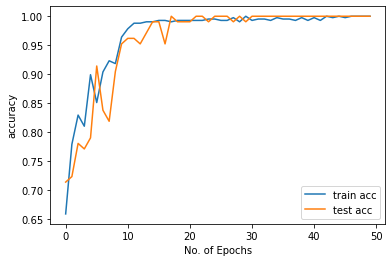

In [ ]:
# accuracies
fig, ax1 = plt.subplots(nrows=1)
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.xlabel('No. of Epochs')
plt.ylabel('accuracy')
plt.legend()
fig.savefig('plotv.png',dpi = 2000) 

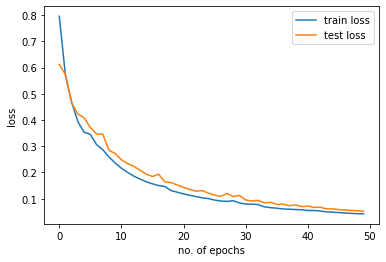

In [ ]:
# loss
fig, ax1 = plt.subplots(nrows=1)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.xlabel('no. of epochs')
plt.ylabel('loss')
plt.legend()
fig.savefig('plot_1v.png',dpi = 2000) 